<h1 style="border: 2px solid cyan; text-align: center; border-radius: 8px; padding: 8px" > Digital Image </h1>


## Importing necessary libraries


In [135]:
import cv2  # to read images
import matplotlib.pyplot as plt  # to display images
import copy  # to crete a deep copy of images
import numpy as np  # for easier manipulation

## Useful functions

In [136]:
def getHeight(image):
    return len(image)


def getWidth(image):
    return len(image[0])


def getColorChannels(image):
    return len(image[0][0])

## 1| Loading `IMG.jpg`


In [137]:
IMG = cv2.imread("./images/IMG.jpg")  # => "IMG.jpg" as a numpy array.
img = cv2.cvtColor(
    IMG, cv2.COLOR_BGR2RGB
)  # This line converts the color space of the image from BGR to RGB.
img = img.tolist()  # Converting the NumPy array IMG to a Python list

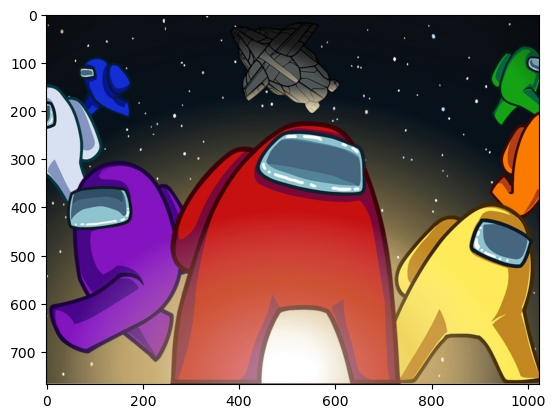

In [138]:
plt.imshow(img)
plt.show()

## 2| Determining the pixel resolution of `IMG`


In [139]:
def getPixelResolution(image):
    return (
        str(getHeight(image))
        + " X "
        + str(getWidth(image))
        + " X "
        + str(getColorChannels(image))
    )

In [140]:
getPixelResolution(image=img)

'768 X 1024 X 3'

## 3| the RGB values of the pixel `IMG(10, 15)`


In [141]:
print("Red:", img[10][15][0])
print("Green:", img[10][15][1])
print("Blue:", img[10][15][2])

Red: 10
Green: 13
Blue: 18


## 4| Calculating the brightness of `IMG`


In [142]:
def getAverageBrightness(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    brightness = 0
    for i in range(m):
        for j in range(n):
            brightness += image[i][j][colorChannel] / (m * n)

    return brightness

In [143]:
print("Red Average Brightness: ", getAverageBrightness(image=img, colorChannel=0))
print("Green Average Brightness: ", getAverageBrightness(image=img, colorChannel=1))
print("Blue Average Brightness: ", getAverageBrightness(image=img, colorChannel=2))

Red Average Brightness:  108.95521799725492


Green Average Brightness:  74.76130930585258
Blue Average Brightness:  72.78973261513856


## 5| Calculating the average contrast of `IMG`


In [144]:
def getAverageContrast(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    max = image[0][0][0]
    min = image[0][0][0]
    for i in range(m):
        for j in range(n):
            if max < image[i][j][colorChannel]:
                max = image[i][j][colorChannel]
            if min > image[i][j][colorChannel]:
                min = image[i][j][colorChannel]

    return max - min

In [145]:
print("Red Average Contrast: ", getAverageContrast(image=img, colorChannel=0))
print("Green Average Contrast: ", getAverageContrast(image=img, colorChannel=1))
print("Blue Average Contrast: ", getAverageContrast(image=img, colorChannel=2))

Red Average Contrast:  255
Green Average Contrast:  255
Blue Average Contrast:  255


## 6| Showing the RGB channels of `IMG` separately


In [146]:
def getChannel(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    o = getColorChannels(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            for k in range(o):
                if k != colorChannel:
                    result[i][j][k] = 0
    return result

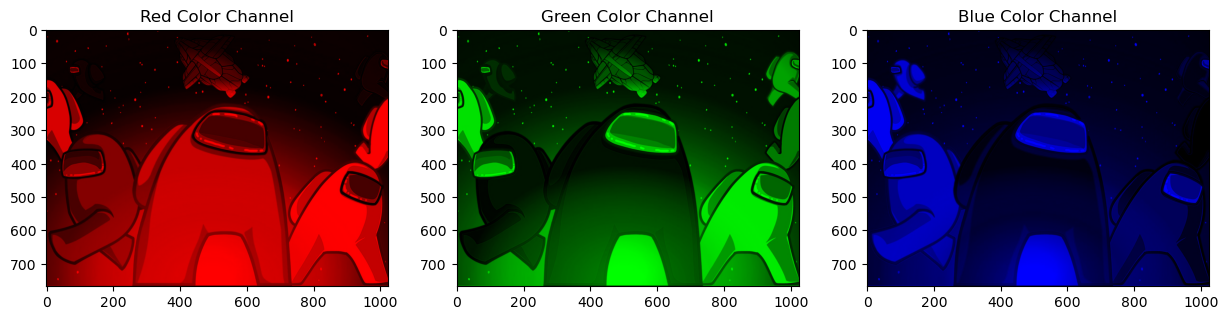

In [147]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(getChannel(image=img, colorChannel=0))
ax[0].set_title("Red Color Channel")
ax[1].imshow(getChannel(image=img, colorChannel=1))
ax[1].set_title("Green Color Channel")
ax[2].imshow(getChannel(image=img, colorChannel=2))
ax[2].set_title("Blue Color Channel")
fig.set_size_inches(15, 5)
plt.show()

## 7| Converting `IMG` to gray-level using the average method


In [148]:
def grayLevelAverageMethod(image):
    m = getHeight(image)
    n = getWidth(image)
    o = getColorChannels(image)
    grayImage = list()
    for i in range(m):
        grayImage.append([])
        for j in range(n):
            colorSum = 0
            for k in range(o):
                colorSum += image[i][j][k]
            grayImage[i].append(colorSum / 3)

    return grayImage

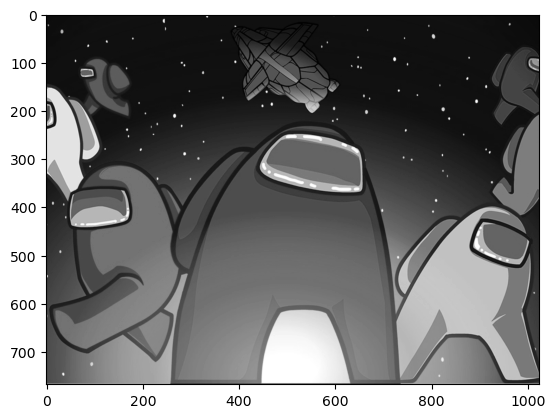

In [149]:
plt.imshow(grayLevelAverageMethod(image=img), cmap="gray")
plt.show()

## 8| Converting `IMG` to gray-level using the weighted formula


In [150]:
def loopGrayLevelWeightedFormula(image):  # using loops
    m = getHeight(image)
    n = getWidth(image)
    grayImage = list()
    for i in range(m):
        grayImage.append([])
        for j in range(n):
            colorSum = 0
            colorSum = (
                0.29 * image[i][j][0] + 0.59 * image[i][j][1] + 0.11 * image[i][j][2]
            )
            grayImage[i].append(colorSum / 3)

    return grayImage

In [151]:
def numpyGrayLevelWeightedFormula(image):  # without loop
    npImage = np.array(image)  # Convert image to numpy array
    npGrayImage = np.dot(
        npImage[..., :3], [0.29, 0.59, 0.11]
    )  # Apply weighted formula using numpy operations
    npGrayImage /= 3
    grayImage = npGrayImage.tolist()  # Convert gray image array back to Python list

    return grayImage

In [152]:
img2 = cv2.cvtColor(IMG, cv2.COLOR_BGR2GRAY)  # using a built in function

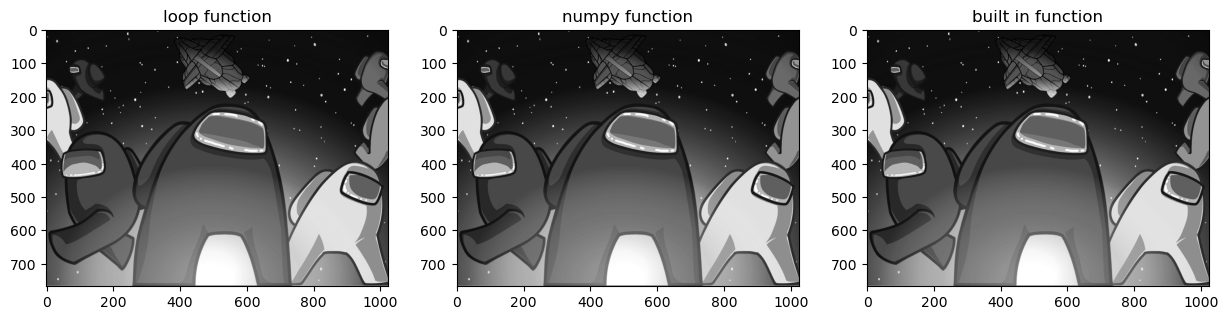

In [153]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(loopGrayLevelWeightedFormula(image=img), cmap="gray")
ax[0].set_title("loop function")
ax[1].imshow(numpyGrayLevelWeightedFormula(image=img), cmap="gray")
ax[1].set_title("numpy function")
ax[2].imshow(img2, cmap="gray")
ax[2].set_title("built in function")
fig.set_size_inches(15, 5)
plt.show()

## 9| Determine the (min , max) value of `IMG` and `IMG2`


In [154]:
def getMinMaxRGB(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    max = image[0][0][0]
    min = image[0][0][0]
    for i in range(m):
        for j in range(n):
            if max < image[i][j][colorChannel]:
                max = image[i][j][colorChannel]
            if min > image[i][j][colorChannel]:
                min = image[i][j][colorChannel]

    return min, max

In [155]:
def getMinMaxIntensity(image):
    m = getHeight(image)
    n = getWidth(image)
    max = image[0][0]
    min = image[0][0]
    for i in range(m):
        for j in range(n):
            if max < image[i][j]:
                max = image[i][j]
            if min > image[i][j]:
                min = image[i][j]

    return min, max

In [156]:
print("Red (min , max): ", getMinMaxRGB(image=img, colorChannel=0))
print("Green (min , max): ", getMinMaxRGB(image=img, colorChannel=1))
print("Blue (min , max): ", getMinMaxRGB(image=img, colorChannel=2))
print("Intensity image (min , max): ", getMinMaxIntensity(image=img2))

Red (min , max):  (0, 255)
Green (min , max):  (0, 255)
Blue (min , max):  (0, 255)
Intensity image (min , max):  (0, 255)


## 10| Calculating the pixel resolution of `IMG` and `IMG2`


In [157]:
def getPixelResolution(image, unit="px"):
    px = getHeight(image) * getWidth(image)
    mp = px / 1000000
    if unit == "px":
        return px
    elif unit == "mp":
        return mp

In [158]:
print("Resolution in px: ", getPixelResolution(image=img, unit="px"))
print("Resolution in mp: ", getPixelResolution(image=img, unit="mp"))

Resolution in px:  786432
Resolution in mp:  0.786432


## 11| A function to calculate the size of `IMG`


In [159]:
def getSize(image):
    return getPixelResolution(image) * getColorChannels(image) * 8

In [160]:
print("size: ", getSize(image=img), "bit")

size:  18874368 bit


## 12| Extracting a sub-image from `IMG`


In [161]:
def subImage(image, rows, cols):
    return [i[cols[0] : cols[1]] for i in image[rows[0] : rows[1]]]

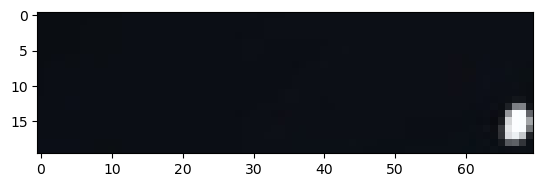

In [162]:
SUB_IMG = subImage(image=img, rows=(50, 70), cols=(20, 90))
plt.imshow(SUB_IMG)
plt.show()

## 13| Quantizing `IMG2` to `128, 64, 32` levels and displaying it


In [163]:
def quantize(image, levels):
    m = getHeight(image)
    n = getWidth(image)
    o = len(levels)
    levels.sort()
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            b = False
            for k in range(o):
                if levels[k] >= image[i][j]:
                    result[i][j] = levels[k]
                    b = True
                    break
    if b == False:
        result[i][j] = levels[-1]
    return result

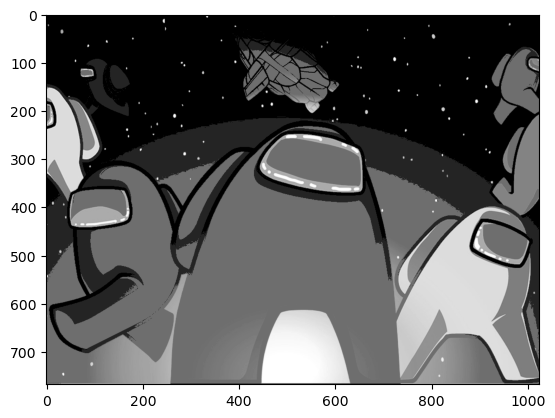

In [164]:
plt.imshow(quantize(image=img2, levels=[128, 64, 32]), cmap="gray")
plt.show()

## 14| Converting `IMG` from RGB to the different color spaces HSV, CMYK and YCbCr


In [165]:
def RGBtoCMYK(image):
    pass

In [166]:
def RGBtoHSV(image):
    pass

In [167]:
def RGBtoYCbCr(image):
    pass

## 15| Binarizing `IMG2` according to `10, 50, 125, 25` as threshold


In [168]:
def binarize(image, threshold):
    m = getHeight(image)
    n = getWidth(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            if result[i][j] > threshold:
                result[i][j] = 255
            else:
                result[i][j] = 0
    return result

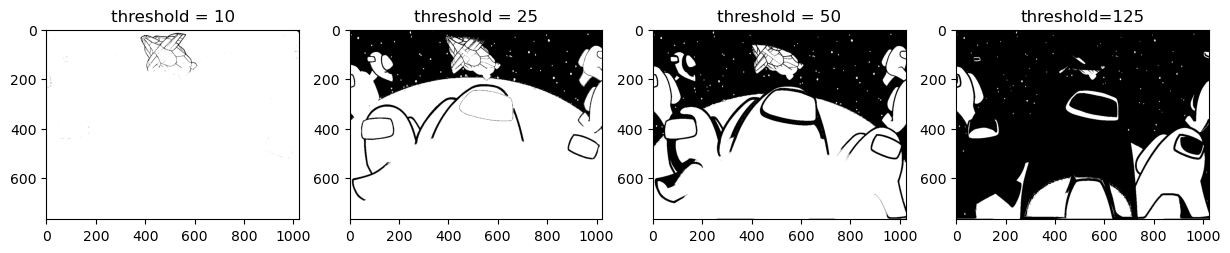

In [169]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(binarize(image=img2, threshold=10), cmap="gray")
ax[0].set_title("threshold = 10")
ax[1].imshow(binarize(image=img2, threshold=25), cmap="gray")
ax[1].set_title("threshold = 25")
ax[2].imshow(binarize(image=img2, threshold=50), cmap="gray")
ax[2].set_title("threshold = 50")
ax[3].imshow(binarize(image=img2, threshold=125), cmap="gray")
ax[3].set_title("threshold=125")
fig.set_size_inches(15, 5)
plt.show()

## 16| Calculating the complementary image of `IMG2` and its binarized version


In [170]:
def compliment(image):
    m = getHeight(image)
    n = getWidth(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            result[i][j] = 255 - result[i][j]
    return result

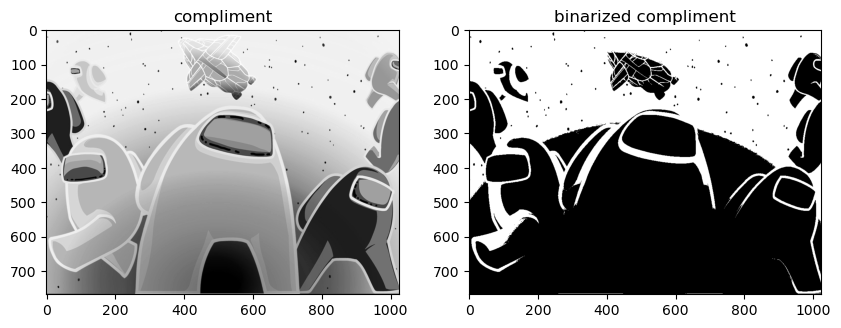

In [171]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(compliment(image=img2), cmap="gray")
ax[0].set_title("compliment")
ax[1].imshow(binarize(image=compliment(image=img2), threshold=200), cmap="gray")
ax[1].set_title("binarized compliment")
fig.set_size_inches(10, 5)
plt.show()

## 17| Adding (and subtracting) the following values `10, 30,60, 200` from `IMG2`


In [172]:
def addValue(image, value):
    return [i + value for i in image]

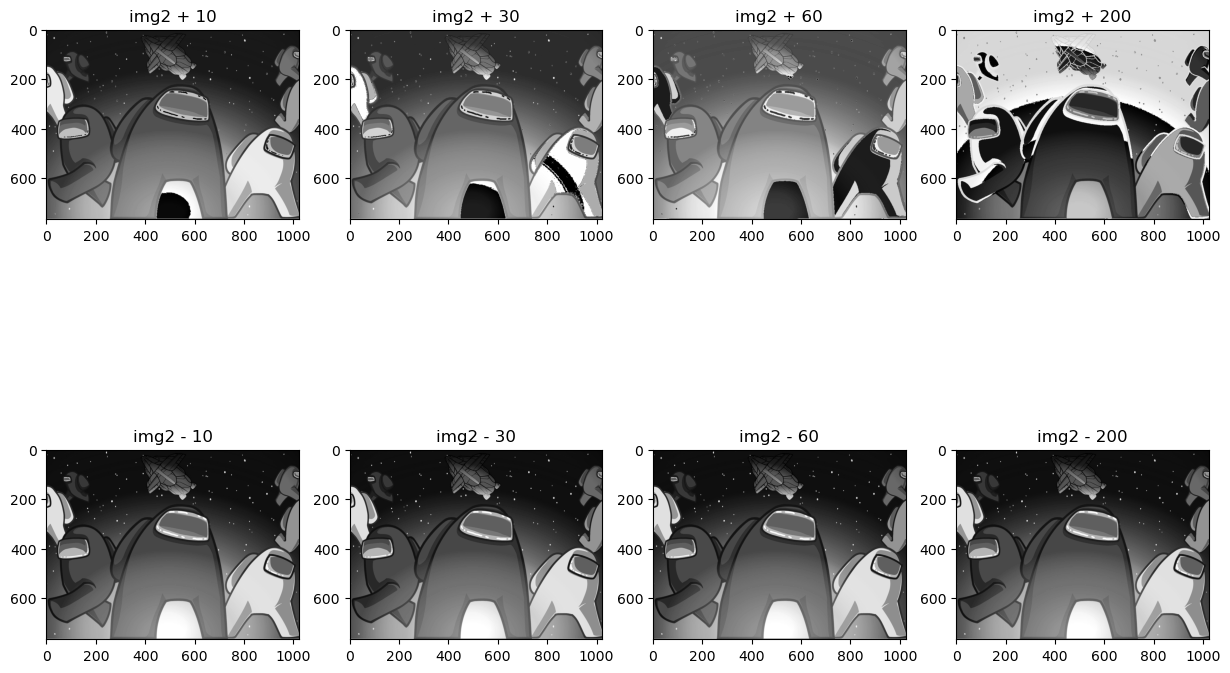

In [173]:
fig, ax = plt.subplots(2, 4)
ax[0, 0].imshow(addValue(image=img2, value=10), cmap="gray")
ax[0, 0].set_title("img2 + 10")
ax[0, 1].imshow(addValue(image=img2, value=30), cmap="gray")
ax[0, 1].set_title("img2 + 30")
ax[0, 2].imshow(addValue(image=img2, value=60), cmap="gray")
ax[0, 2].set_title("img2 + 60")
ax[0, 3].imshow(addValue(image=img2, value=200), cmap="gray")
ax[0, 3].set_title("img2 + 200")
ax[1, 0].imshow(addValue(image=img2, value=-10), cmap="gray")
ax[1, 0].set_title("img2 - 10")
ax[1, 1].imshow(addValue(image=img2, value=-30), cmap="gray")
ax[1, 1].set_title("img2 - 30")
ax[1, 2].imshow(addValue(image=img2, value=-60), cmap="gray")
ax[1, 2].set_title("img2 - 60")
ax[1, 3].imshow(addValue(image=img2, value=-200), cmap="gray")
ax[1, 3].set_title("img2 - 200")
fig.set_size_inches(15, 10)
plt.show()

## 18| Increasing / decreasing image brightness by multiplying `IMG2` by `1.7` and `0.6`, respectively


In [174]:
def multiplyByValue(image, value):
    return [i*value for i in image]

## 19| Devising the image by `2` and `0.5`, respectively


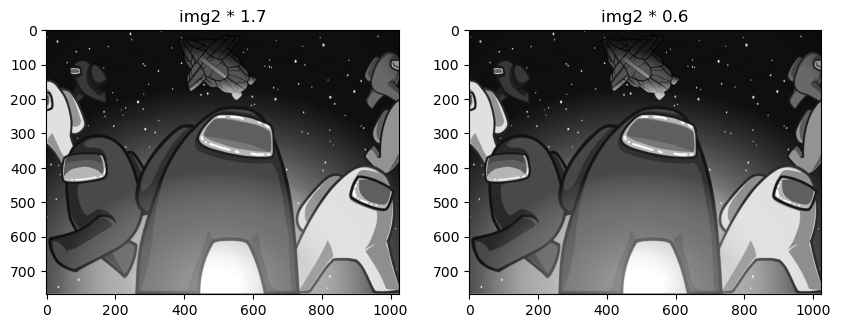

In [175]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(multiplyByValue(image=img2, value=1.7), cmap="gray")
ax[0].set_title("img2 * 1.7")
ax[1].imshow(multiplyByValue(image=img2, value=0.6), cmap="gray")
ax[1].set_title("img2 * 0.6")
fig.set_size_inches(10, 5)
plt.show()

## 20| Loading `IMG3`


In [176]:
IMG3 = cv2.imread("./images/IMG3.jpg")  # => "IMG.jpg" as a numpy array.
img3 = cv2.cvtColor(
    IMG3, cv2.COLOR_BGR2RGB
)  # This line converts the color space of the image from BGR to RGB.
img3 = img3.tolist()  # Converting the NumPy array IMG to a Python list

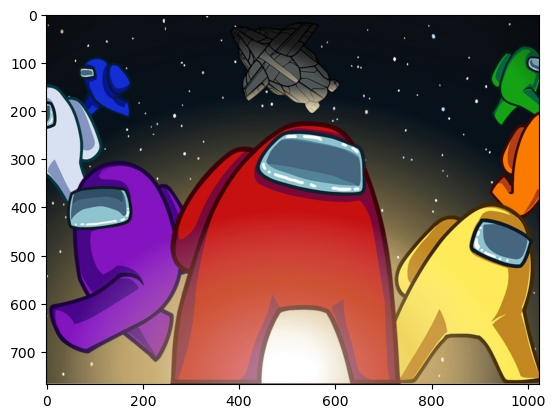

In [177]:
plt.imshow(img3)
plt.show()

## 21| Calculating the min / max of `(IMG2, IMG3)`


## 22| Combining `IMG2` and `IMG3` linearly using `(0.1, 0.9), (0.5, 0.5),(0.9, 0.1)`


## 23| Creating two images containing squares


In [178]:
# (the intersection of squares is not zero)

## 24| Performing the following logical operations: AND, OR, XOR, XNOR on the two image square


## 25| Generating two other binary images containing arbitrary shapes


## 26| Performing the following operations: erosion, dilation, opening and closing on the image using a 3\*3 square binary image as a structural element


## 27| Generating the gray-level histogram of `IMG2`


## 28| Adding 70 to all the image pixels, and comparing the histogram before and after


## 29| Loading a low contrast image `IMG4`


In [179]:
#  Load a low contrast image from your choice (IMG4)

## 30| Applying the histogram stretching (the two formulas of course), and showing the histogram before and after each process


## 31| Applying Gamma correction on `IMG2`, where the values of Gamma are: `1.5, 4.2, 2.1`


## 32| Applying the algorithm of histogram equalization on `IMG4`, and showing the histogram before and after


In [180]:
# Apply the algorithm of histogram equalization on IMG4, and show the histogram
# before and after this is done (choose the suitable Lmax based on the first histogram).

## 33| Loading `IMG5`


In [181]:
# Load an image from your choice (IMG5)

## 34| Adding a salt, pepper, salt-pepper, Gaussian noise to `IMG5`


## 35| Applying mean and Gaussian filters on the noisy versions of `IMG5`


In [182]:
# (vary the parameters)

## 36| Applying the median filter with a neighborhood of `3,5` and `7`, respectively.


## 37| Applying Sobel operator on `IMG5`, and showing the horizontal, vertical and the final edge


## 38| Showing the gradient magnitude image of `IMG5`, and threshold it using `10, 50, 120, 190` and showing the resulting images


## 39| Showing the edge image in which the pixels kept only with the maximum of gradient in the gradient direction


## 40| Detecting the edges in `IMG5` using Laplacian of Gaussian


## 41| Detect the edges in IMG5 using canny algorithm
